In [1]:
# KHÓA LUẬN TỐT NGHIỆP - Source code - EDA
# Lại Minh Phú - MSSV: 20127593
# Hồ Minh Thanh Tài - MSSV: 20127068
import numpy as np 
import pandas as pd 

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gs

from imblearn.over_sampling import SMOTE
from sklearn.linear_model     import LogisticRegression
from sklearn.ensemble         import RandomForestClassifier
from sklearn.model_selection  import train_test_split,StratifiedShuffleSplit
from sklearn.metrics          import classification_report,confusion_matrix,auc,roc_auc_score,roc_curve,precision_score,recall_score

In [2]:
# Đầu tiên , ta đọc tập dữ liệu. Dataset được lấy từ Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud

df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# Cột'Time' = Số giây trôi qua giữa giao dịch này và giao dịch đầu tiên trong tập dữ liệu
# Cột 'Amount' =  Số lượng giáo dịch
# Cột 'Class': 0 =>Not Fraud , 1 =>Fraud
# V columns (column #1 to #28) => thông tin nhạy cảm (các đặc trưng này được mã hóa) 

Feature_Size = len(df.columns)
Class_Index = Feature_Size -1 
print("Tổng các đặc trưng = ",Feature_Size)
print("Class Index = ",Class_Index)
df.head()

Tổng các đặc trưng =  31
Class Index =  30


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['Class'].value_counts()
# Giao dịch có 284315 Non-Fraud, 492 Fruad 

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
# Kiểm tra nếu tồn tại giá trị null ==> không có
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
f,ax = plt.subplots(figsize=(6,8))
ax = sns.countplot(x='class', data=df, palette='Set1')
plt.show()

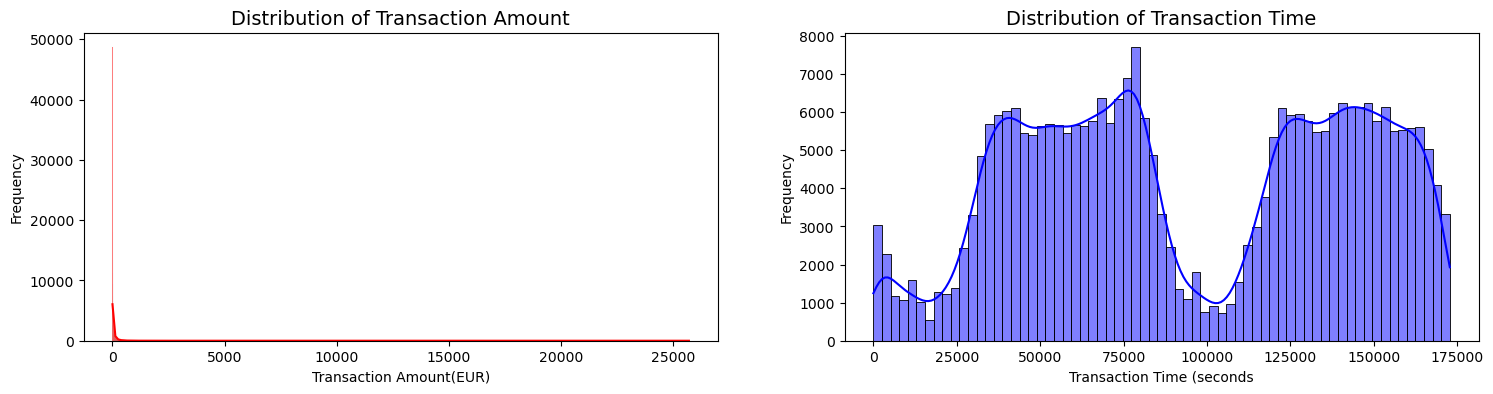

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

# Biểu đồ về 'Phân phối Số tiền Giao dịch'
sns.histplot(amount_val, ax=ax[0], color='r', kde=True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlabel('Transaction Amount(EUR)')
ax[0].set_ylabel('Frequency')


# Biểu đồ về 'Phân phối Thời gian Giao dịch'
sns.histplot(time_val, ax=ax[1], color='b', kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlabel('Transaction Time (seconds')
ax[1].set_ylabel('Frequency')

# Ta kiểm tra giá trị 'thời gian' của giao dịch lừa đảo và giao dịch thông thường so sánh theo số lượng giao dịch.
#Trong cả hai trường hợp, thuộc tính 'thời gian' có vẻ tương tự, nhưng nếu nhìn kỹ, có thể nhận thấy rằng
# giao dịch bình thường được phân bố đều, trong khi giao dịch gian lận thì không.
plt.show()


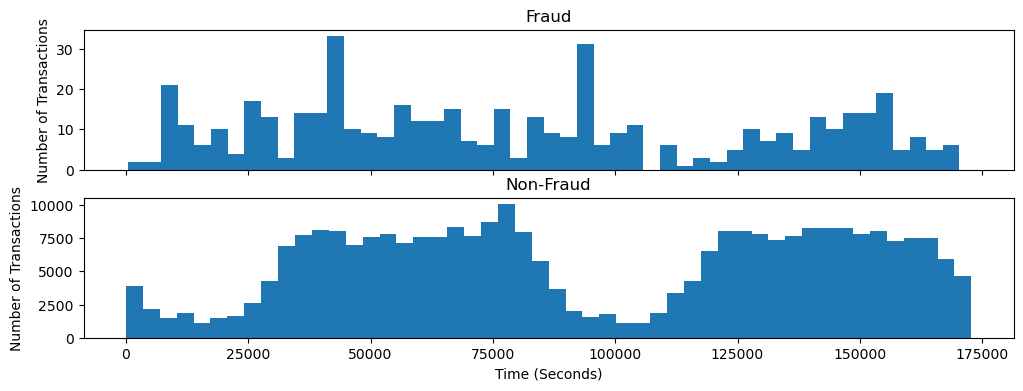

In [8]:
# Kiểm tra số lượng giao dịch Fraud và Non - Fraud theo cột 'Time'
fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50

axis_1.hist(df.Time[df.Class == 1], bins = bins)
axis_1.set_title('Fraud')
axis_1.set_ylabel('Number of Transactions', y=0.5)

axis_2.hist(df.Time[df.Class == 0], bins = bins)
axis_2.set_title('Non-Fraud')
axis_2.set_ylabel('Number of Transactions', y=0.5)

plt.xlabel('Time (Seconds)')
#plt.ylabel('Number of Transactions', y =0.5)
plt.show()

# Các đặc trưng về 'Time' có vẻ có mối tương quan nhưng nếu nhìn kỹ ta thấy 
#giao dịch Non- Fraud được phân phối đều hơn so với Fraud

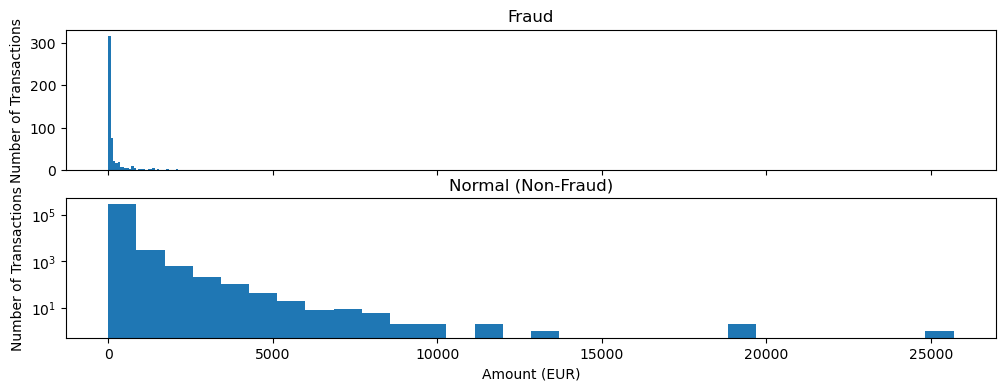

In [9]:
# Kiểm tra số lượng giao dịch Fraud và Non - Fraud theo cột 'Amount'

fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

axis_1.hist(df.Amount[df.Class == 1], bins = bins)
axis_1.set_title('Fraud')
axis_1.set_ylabel('Number of Transactions', y=0.5)

axis_2.hist(df.Amount[df.Class == 0], bins = bins)
axis_2.set_title('Normal (Non-Fraud)')
axis_2.set_ylabel('Number of Transactions', y=0.5)

plt.xlabel('Amount (EUR)')
#plt.ylabel('Number of Transactions')
plt.yscale("log")
plt.show()

# Số lượng fraud khá nhỏ nhưng số lượng non-fraud cũng nhỏ không kém nên ta có thể nói nếu số "Amount" lớn thì chưa chắc
#nó là fraud


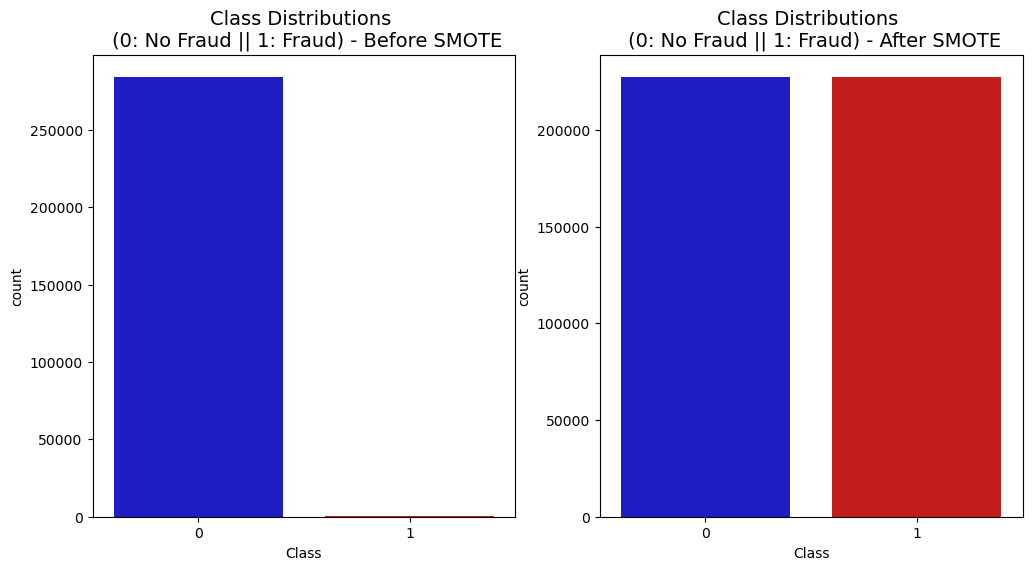

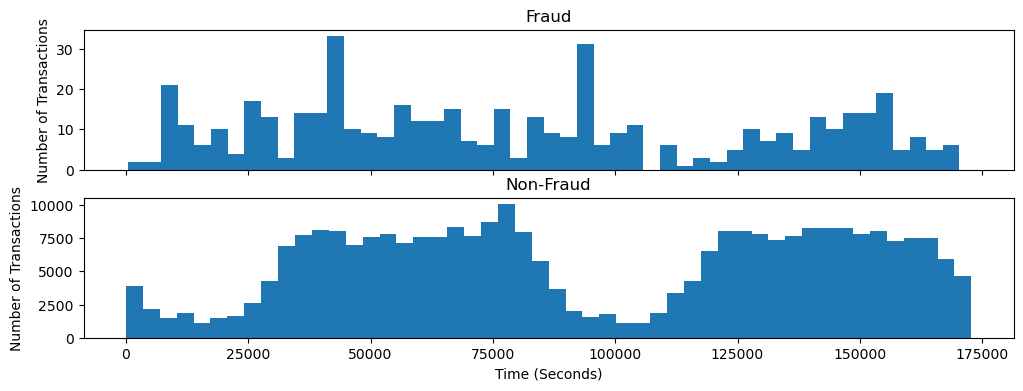

In [10]:
X = df.drop('Class', axis=1) 
y = df['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ứng dụng kỹ thuật SMOTE để tăng cường số mẫu fraud
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X_train.columns), pd.Series(y_resampled, name='Class')], axis=1)

#'Class' and 'Amount'
colors = ["#0101DF", "#DF0101"]
plt.figure(figsize=(12, 6))

# Biểu đồ trước SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud) - Before SMOTE', fontsize=14)

# Biểu đồ sau SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x='Class', data=df_resampled, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud) - After SMOTE', fontsize=14)

plt.show()

# Kiểm tra số lượng giao dịch Fraud và Non - Fraud theo cột 'Time'
fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50

axis_1.hist(df.Time[df.Class == 1], bins = bins)
axis_1.set_title('Fraud')
axis_1.set_ylabel('Number of Transactions', y=0.5)

axis_2.hist(df.Time[df.Class == 0], bins = bins)
axis_2.set_title('Non-Fraud')
axis_2.set_ylabel('Number of Transactions', y=0.5)

plt.xlabel('Time (Seconds)')
#plt.ylabel('Number of Transactions', y =0.5)
plt.show()

# Các đặc trưng về 'Time' có vẻ có mối tương quan nhưng nếu nhìn kỹ ta thấy 
#giao dịch Non- Fraud được phân phối đều hơn so với Fraud

In [11]:
# Nhìn kỹ về các giao dịch Fraud
# Xem số lương giao dịch Fraud trong trường hợp Scale nhỏ 
print(df.Amount[df.Class == 1 ].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [12]:
# Xem số lương giao dịch Not - Fraud trong trường hợp Scale nhỏ
print(df.Amount[df.Class == 0 ].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


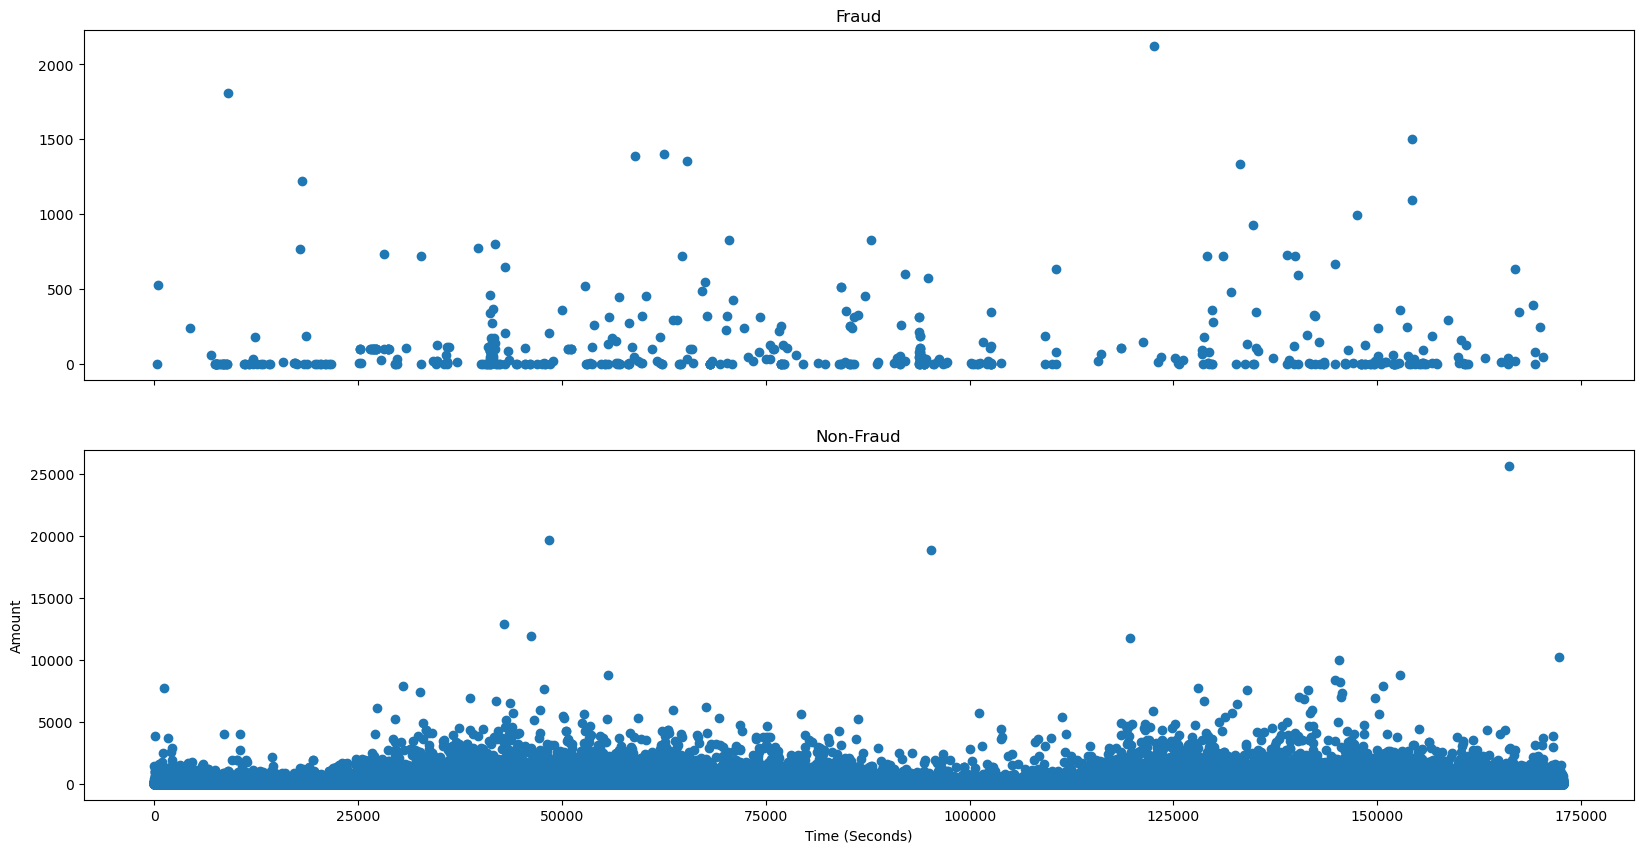

In [13]:
# lập biểu đồ phân tán cho đặc trưng 'Time' và 'Amount' ==> dữ liệu khắp mọi nơi, không tiện cho việc train mô hình

fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))

axis_1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
axis_1.set_title('Fraud')

axis_2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
axis_2.set_title('Non-Fraud')

plt.xlabel('Time (Seconds)')
plt.ylabel('Amount')
plt.show()


# Xét từng đặc trưng đã được mã hóa (V1 đến V28). Chọn ra những đặc trưng quan trọng để train cho mô hình

In [14]:
# Kết luận
# V8, V13, V15, V20, V22, V23, V24, V25, V26, V27, V28: tần suất fraud and non-fraud quá giống nhau -> không dùng tới
# V1, V2, V5, V6, V21: tần suất fraud and non-fraud gần giống nhau => test thử
# V3, V4,V7,V9,V10, V11,V12,V14, V16,V17,V18,V19: tần suất fraud and non-fraud KHÔNG giống nhau=> dùng tới

# nên dùng các V -features = [ 3,4,7,9,10,11,12,14,16,17,18,19 ]
# KHÔNG nên dùng Features = [ 8,13,15,20,22,23,24,25,26,27,28 ]
# Chưa chắc chắn, cần phải test = [ 1,2,5,6,21 ]

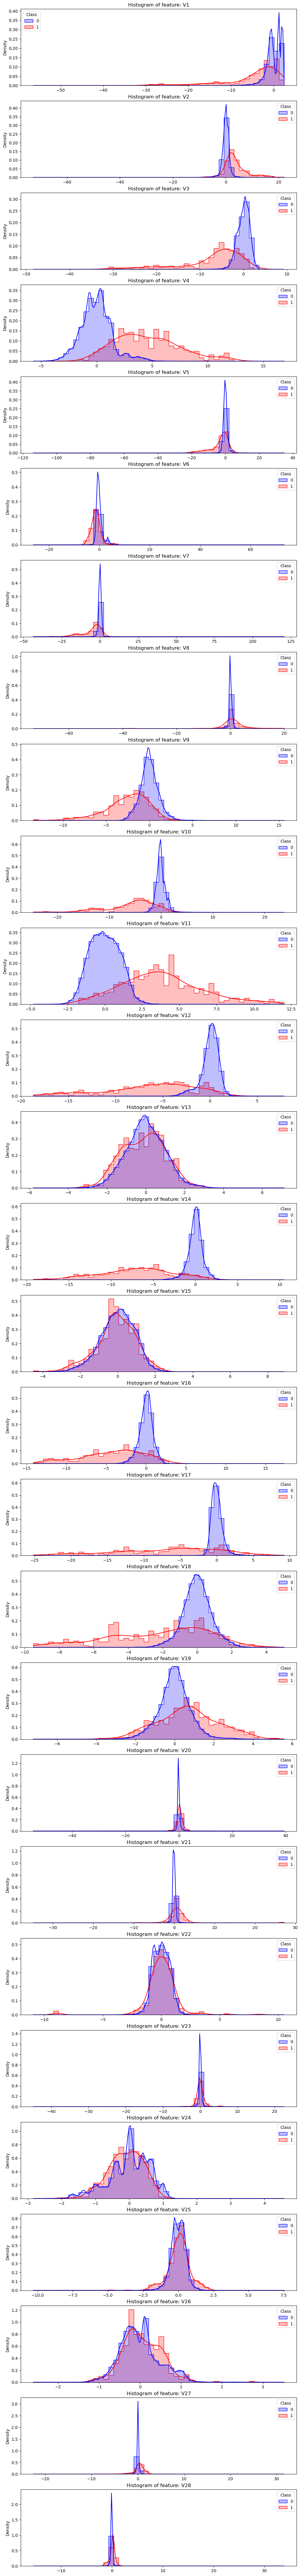

In [15]:
v_features = df.iloc[:, 1:29].columns

# Biểu diễn biểu đồ tần suất các đặc trưng (fraud + non-fraud) xem cái nào hữu ích cho việc train mô hình

plt.figure(figsize=(12, 28*4))
gs = gs.GridSpec(28, 1)

for i, cn in enumerate(v_features):
    ax = plt.subplot(gs[i])
    sns.histplot(data=df, x=cn, bins=50, kde=True, hue="Class", element="step", common_norm=False, stat="density", palette={"red", "blue"})
    ax.set_xlabel('')
    ax.set_title('Histogram of feature: ' + cn)

plt.show()


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


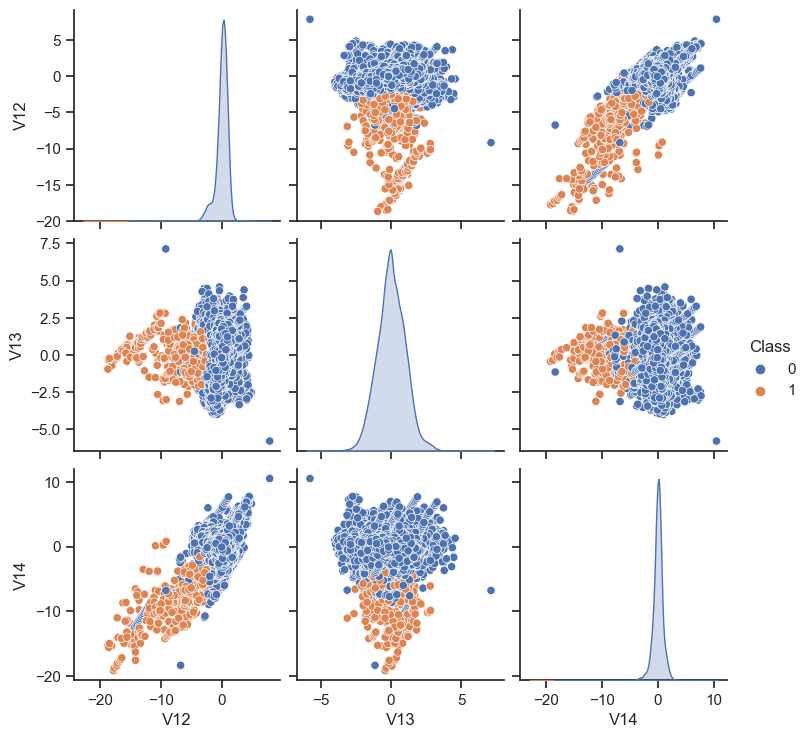

In [16]:
sns.set(style="ticks")
sns.pairplot(df[["V12","V13","V14","Class"]], hue="Class")

In [17]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


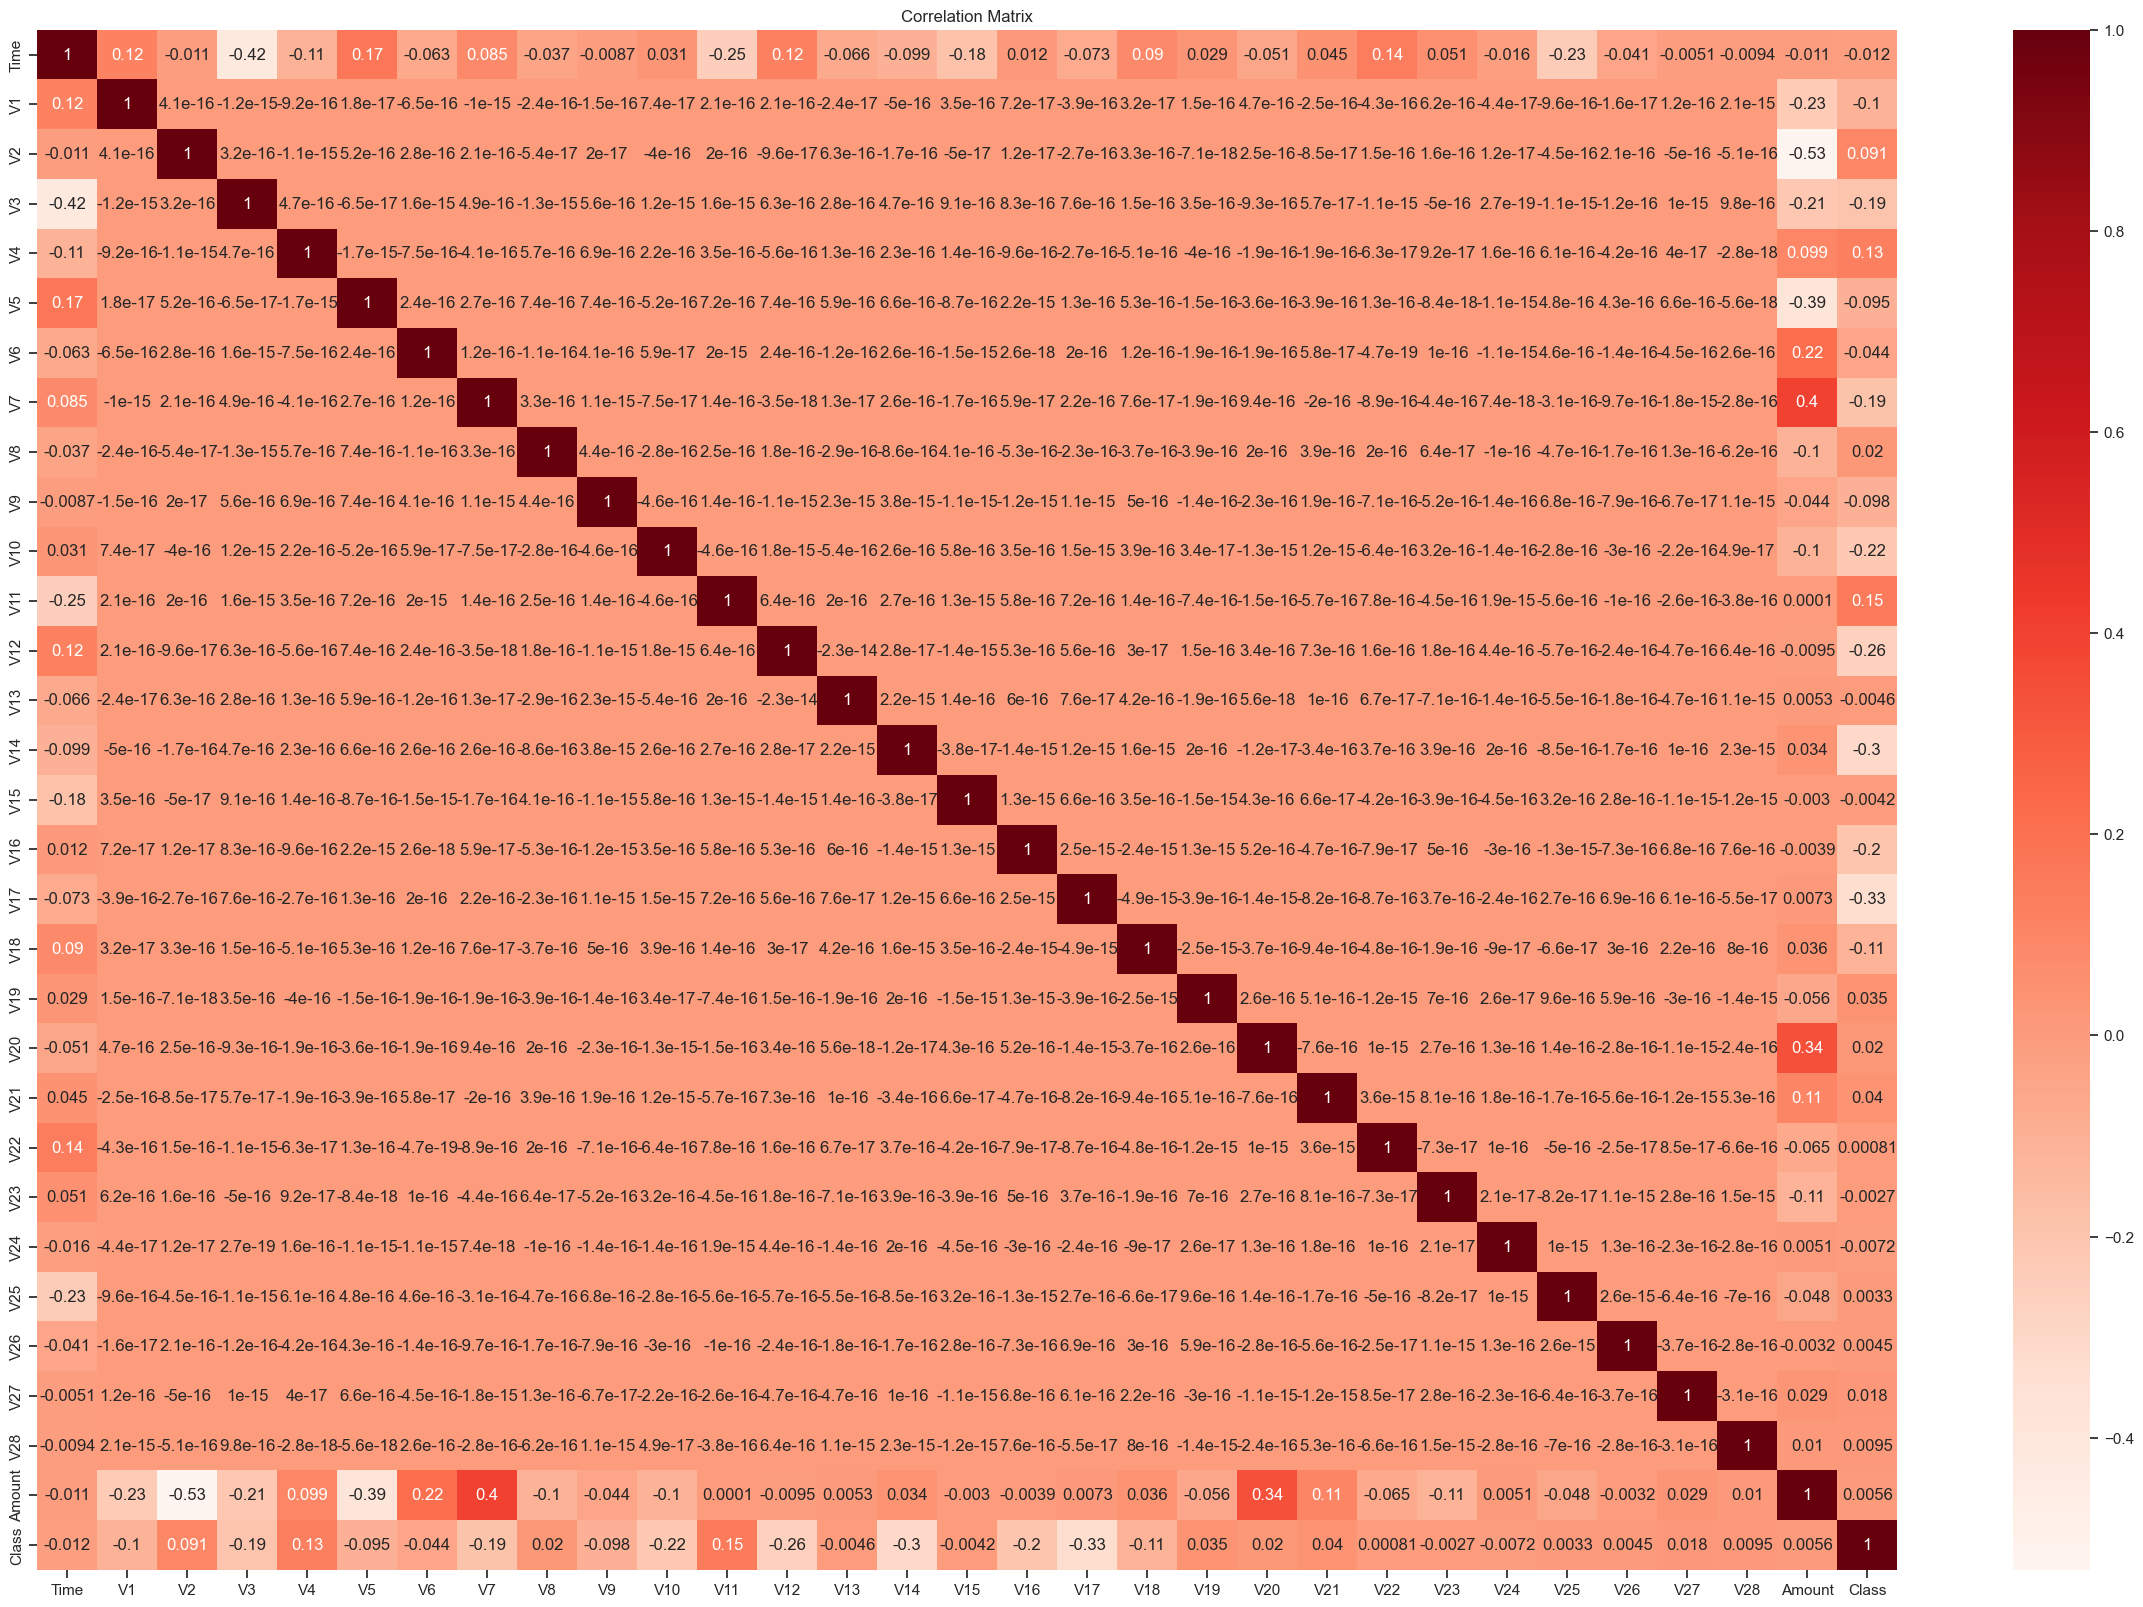

In [18]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),cmap='Reds',annot=True)
plt.title('Correlation Matrix')
plt.show();

# Ma trận tương quan đồ họa cung cấp cho chúng ta một ý tưởng về cách các đặc trưng tương quan với nhau và có thể giúp chúng ta dự đoán những đặc trưng quan trọng nhất cho việc dự đoán. 
# Trong biểu đồ HeatMap, chúng ta có thể thấy rõ rằng hầu hết các đặc trưng không tương quan với các đặc trưng khác, nhưng có một số đặc trưng có tương quan dương hoặc tương quan âm với nhau. 
# Ví dụ, V2 và V5 có tương quan âm cao với đặc trưng gọi là Amount. 
# Chúng ta cũng thấy một số tương quan với V20 và Amount. 
